In [33]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> We have only one feature X ($x_1$) and corresponding target y. </br>
> We know straight line equation is y = m.x + c </br>
> In a more sophisticated ML literature,above can be wriiten as $h_{\theta} = \theta_{0} + \theta_{1}x_{1}$ </br>
> Where $h_{\theta}$ is our hypothesis and $\theta_{0}, \theta_{1}$ are parameters.</br>
> Then our loss function can be written as, $L(\theta) = \frac{1}{2N} \sum_{n = 1}^{N} (h_{\theta} - y)^2$</br>
> Gradient Descent is used for gradient calculation to update parameters.</br>
> $\theta_{0} = \theta_{0} - \alpha \nabla L(\theta_{0})$  = $\theta_{0} - \alpha \frac{1}{N} \sum_{n = 1}^{N}(h_{\theta} - y)$</br>
> $\theta_{1} = \theta_{1} - \alpha \nabla L(\theta_{1})$  = $\theta_{1} - \alpha \frac{1}{N} \sum_{n = 1}^{N}(h_{\theta} - y) * x_1 $</br>

epoch:100--->loss:0.079,theta0:-0.067, theta1:0.872
epoch:200--->loss:0.056,theta0:-0.219, theta1:0.893
epoch:300--->loss:0.039,theta0:-0.347, theta1:0.911
epoch:400--->loss:0.027,theta0:-0.454, theta1:0.925
epoch:500--->loss:0.019,theta0:-0.543, theta1:0.937
epoch:600--->loss:0.013,theta0:-0.618, theta1:0.948
epoch:700--->loss:0.009,theta0:-0.680, theta1:0.956
epoch:800--->loss:0.007,theta0:-0.733, theta1:0.963
epoch:900--->loss:0.005,theta0:-0.776, theta1:0.969
epoch:1000--->loss:0.003,theta0:-0.813, theta1:0.974
[1.1357846 3.08458   5.033375  6.98217   8.930965 ]


Text(0, 0.5, 'Y')

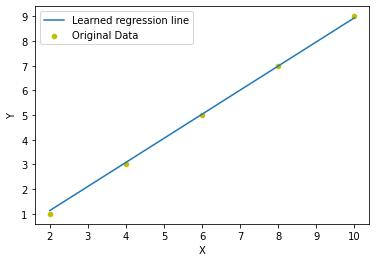

In [32]:
#Simple single feature Linear Regression
theta0 = 0.0
theta1 = 0.0
x = np.array([2,4,6,8,10],dtype =np.float32)
y = np.array([1,3,5,7,9],dtype = np.float32)
n = x.shape[0]
lr = 0.01

for epoch in range(1000):
    h_theta = theta1 * x + theta0
    loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
    theta0 = theta0 - (lr * (h_theta - y).sum() / np.float32(n))
    theta1 = theta1 - (lr * ((h_theta - y) * x).sum() / np.float32(n))
    if (epoch + 1) % 100 == 0:  
        print('epoch:{}--->loss:{:.3f},theta0:{:.3f}, theta1:{:.3f}'.format(epoch+1,loss,theta0,theta1))
pred = (theta1 * x + theta0)
print(pred)

sns.scatterplot(x=x, y=y,color='y',label='Original Data')
sns.lineplot(x=x,y=pred,label='Learned regression line')
plt.xlabel('X')
plt.ylabel('Y')

>In order to generalize the the above equation to multiple feature set X($x_1,x_2,x_3, ... $), we make use of vector notation. </br>
>We append $x_0$(array of 1's) in the front of X, such that our hypothesis will be  $h_{\theta} = \theta_{0}.1 + \theta_{1}x_{1} + \theta_{2}x_{2} + .... $ </br>
>Above hypothesis equation will be $h_{\theta} = \theta . X^{T} $
> Then our loss function can be written as, $L(\theta) = \frac{1}{2N} \sum_{n = 1 }^{N}(\theta . X^{T} - y)^2$</br>
>Where $\theta = [\theta_{0}, \theta{1}, \theta{2}, ... ]$ and $X = [x_{0}, x{1}, x{2}, ... ]$ </br>
>Then Gradient Descent update rule will be, </br>
> $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(\theta . X^{T} - y) . X$

In [31]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
for epoch in range(1000):
    h_theta = theta.dot(X.T)
    loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
    theta = theta - (lr * ((h_theta - y).dot(X) / np.float32(n)))
    if (epoch + 1) % 100 == 0: 
        print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,loss,theta))

epoch:100--->loss:0.077,theta:[[-0.0737137   0.88828266]]
epoch:200--->loss:0.054,theta:[[-0.22320095  0.906312  ]]
epoch:300--->loss:0.038,theta:[[-0.34856334  0.92143166]]
epoch:400--->loss:0.027,theta:[[-0.4536945  0.9341113]]
epoch:500--->loss:0.019,theta:[[-0.5418593   0.94474465]]
epoch:600--->loss:0.013,theta:[[-0.61579585  0.953662  ]]
epoch:700--->loss:0.009,theta:[[-0.67780006  0.9611402 ]]
epoch:800--->loss:0.007,theta:[[-0.7297979  0.9674115]]
epoch:900--->loss:0.005,theta:[[-0.7734043  0.9726708]]
epoch:1000--->loss:0.003,theta:[[-0.80997336  0.9770813 ]]


>Neatly packageing all code in a class. </br>
>Running the Linear Regression model on synthetic data. </br>


In [2]:
#A function to generate a data with some gaussian noise
"""
size: Number of samples required
mean: Mean of the gaussian noise, controls the amount of data dispersion.
var: Variance of gaussian noise, controls the data dispersion.
 """
def generate_regression(size,mean,var):
    X = []
    y = []
    for i in range(0,size):
        temp = np.array(np.random.random() * 1000) 
        X.append(temp)
        y.append(3 * temp + np.random.normal(mean,var))
    y = np.array(y)
    X = np.array(X)
    return X,y

Text(0, 0.5, 'y')

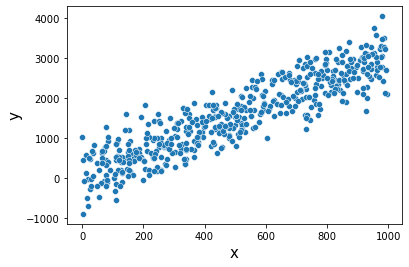

In [15]:
#Generating and plotting the data
X_train,y_train = generate_regression(500,50,400)
X_test = [x for x in range(1001)]
sns.scatterplot(x=X_train,y = y_train)
plt.xlabel('x',fontsize = 15)
plt.ylabel('y',fontsize = 15)

In [18]:
#Model Defination
"""
This class represents the Linear Regression model, and contains all the codes needed for Linear regression.
model.fit() - Performs the optimization on loss function to get optimal parameters.
model.predict() - Returns predicted targets using optimized parameter.
model.plot_model() - Plots the Training data along with learned curve.
"""
class linear_regression:
    def __init__(self,lr = 0.01,epochs = 100):
        self.loss = None
        self.lr = lr
        self.theta = None
        self.epochs = epochs
        
    def fit(self,X,y):
        X = X.reshape(X.shape[0],1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(self.epochs):
            h_theta = self.theta.dot(X.T)
            self.loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
            self.theta = self.theta - (self.lr * ((h_theta - y).dot(X) / np.float32(n)))
            if (epoch + 1) % 1000 == 0: 
                print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,self.loss,self.theta))
        return self.theta
    
    def predict(self,X):
        y_pred = np.array([(self.theta[0,0] + self.theta[0,1] * x) for x in X_test])
        return y_pred
    
    def plot_model(self,X_train,X_test,y_train,y_pred):
        sns.lineplot(x=X_test,y = y_pred,color = 'r',label= 'Learned Curve')
        sns.scatterplot(x=X_train,y = y_train,label = 'Train Data')
        plt.xlabel('X',fontsize = 15)
        plt.ylabel('y',fontsize = 15)
        plt.legend()
        plt.show()

epoch:1000--->loss:83250.100,theta:[[0.30511394 3.09146302]]
epoch:2000--->loss:83249.921,theta:[[0.31849022 3.09144289]]
epoch:3000--->loss:83249.742,theta:[[0.33186313 3.09142276]]
epoch:4000--->loss:83249.563,theta:[[0.34523267 3.09140264]]
epoch:5000--->loss:83249.385,theta:[[0.35859883 3.09138252]]
epoch:6000--->loss:83249.206,theta:[[0.37196163 3.09136241]]
epoch:7000--->loss:83249.028,theta:[[0.38532105 3.0913423 ]]
epoch:8000--->loss:83248.849,theta:[[0.39867711 3.0913222 ]]
epoch:9000--->loss:83248.671,theta:[[0.4120298 3.0913021]]
epoch:10000--->loss:83248.493,theta:[[0.42537912 3.09128201]]


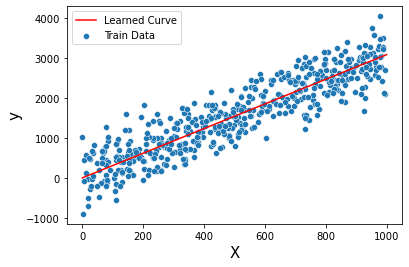

In [22]:
#Model Building
model = linear_regression(lr= 0.000001,epochs=10000)
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)